# Advanced Clustering

In [8]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns



from collections import defaultdict
from sklearn.metrics import silhouette_score

In [2]:
df_train = pd.read_csv('csv/New_train.csv')
df_test = pd.read_csv('csv/New_test.csv')

In [3]:
to_drop_train = ['ActivityName','Activity','subject','Outlier_label', 'Class'] 
train = df_train.drop(to_drop_train, axis=1, inplace=False)

to_drop_test = ['ActivityName','Activity','subject'] 
test = df_test.drop(to_drop_test, axis=1, inplace=False)

In [4]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


---

# X-Means

In [150]:
from pyclustering.cluster import xmeans

In [151]:
xm = xmeans.xmeans(train)
xm.process()

In [152]:
clusters = xm.get_clusters()

In [169]:
len(clusters)

20

In [171]:
for idx, c in enumerate(clusters):
    print('Dimensione del {} cluster è {}'.format(idx+1, len(c)))

Dimensione del 1 cluster è 199
Dimensione del 2 cluster è 355
Dimensione del 3 cluster è 251
Dimensione del 4 cluster è 430
Dimensione del 5 cluster è 381
Dimensione del 6 cluster è 415
Dimensione del 7 cluster è 297
Dimensione del 8 cluster è 416
Dimensione del 9 cluster è 233
Dimensione del 10 cluster è 54
Dimensione del 11 cluster è 137
Dimensione del 12 cluster è 125
Dimensione del 13 cluster è 1126
Dimensione del 14 cluster è 540
Dimensione del 15 cluster è 655
Dimensione del 16 cluster è 292
Dimensione del 17 cluster è 425
Dimensione del 18 cluster è 270
Dimensione del 19 cluster è 714
Dimensione del 20 cluster è 37


In [153]:
# centroids of the clusters
centers = xm.get_centers()

### Visualization in two dimensions using PCA

In [154]:
from sklearn.decomposition import PCA

In [155]:
pca = PCA(n_components=2)
pca.fit(train.values)
train_pca = pca.transform(train.values)

In [156]:
centers_pca = pca.transform(centers)

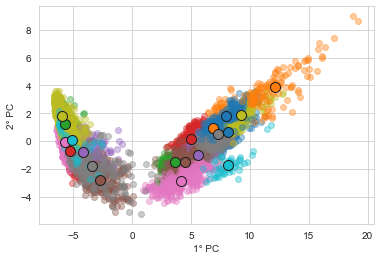

In [161]:
for indexes in clusters:
    plt.scatter(train_pca[indexes,0], train_pca[indexes,1], alpha=0.4)
for c in centers_pca:
    plt.scatter(c[0], c[1], s=100, edgecolors='k')
plt.xlabel('1° PC')
plt.ylabel('2° PC')
plt.show()

---

# OPTICS

The OPTICS is first used with its Xi cluster detection method, and then setting specific thresholds on the reachability, which corresponds to DBSCAN. We can see that the different clusters of OPTICS’s Xi method can be recovered with different choices of thresholds in DBSCAN.

In [5]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan

In [89]:
clust = OPTICS(min_samples=5, max_eps=np.inf )
clust.fit(train)

OPTICS()

In [96]:
np.unique(clust.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21])

In [98]:
for i in range(-1, len(np.unique(clust.labels_))):
    count = 0
    for e in clust.labels_:
        if i == e:
            count+=1
    print(i , count)

-1 7054
0 5
1 5
2 7
3 8
4 7
5 20
6 12
7 59
8 7
9 5
10 6
11 5
12 18
13 18
14 6
15 7
16 21
17 26
18 23
19 10
20 5
21 18
22 0


In [91]:
# when we compute the silouhette score is important to remove outliers
silhouette_score(train[clust.labels_ != -1], clust.labels_[clust.labels_ != -1])

0.3052139575125638

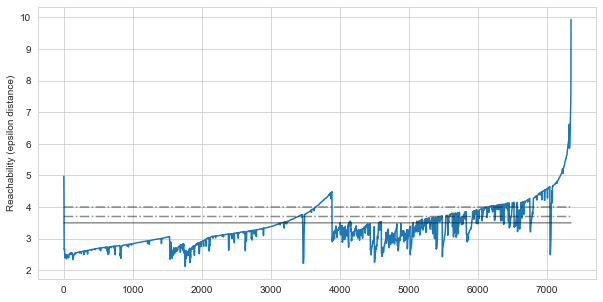

In [172]:
reachability = clust.reachability_[clust.ordering_]
plt.figure(figsize=(10, 5))
plt.plot(reachability[1:])
plt.plot(space, np.full_like(space, 3.5, dtype=float), "k-", alpha=0.5)
plt.plot(space, np.full_like(space, 3.7, dtype=float), "k-.", alpha=0.5)
plt.plot(space, np.full_like(space, 4 , dtype=float), "k-.", alpha=0.5)
plt.ylabel('Reachability (epsilon distance)')
# plt.title('Reachability plot')
plt.show()

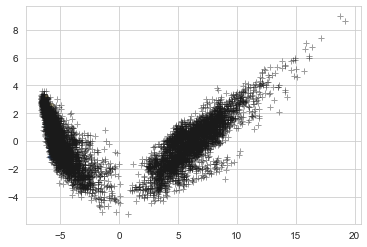

In [93]:
# OPTICS
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = train_pca[clust.labels_ == klass]
    plt.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
    plt.plot(train_pca[clust.labels_ == -1, 0], train_pca[clust.labels_ == -1, 1], "k+", alpha=0.1)

### Perform DBSCAN extraction for an arbitrary epsilon.

Extracting the clusters runs in linear time. Note that this results in labels_ which are close to a DBSCAN with similar settings and eps, only if eps is close to max_eps.

In [146]:
# DBSCAN at 3.5
labels_35 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=3.5,
)

In [147]:
np.unique(labels_35)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

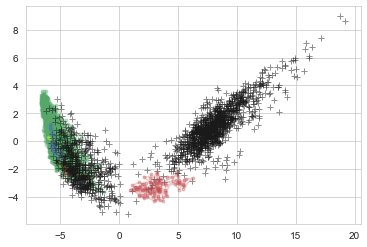

In [148]:
# DBSCAN at 3.5
colors = ["g", "greenyellow", "olive", "r", "b", "r"]
for klass, color in zip(range(0, 6), colors):
    Xk = train_pca[labels_35 == klass]
    plt.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3, marker=".")
    plt.plot(train_pca[labels_45 == -1, 0], train_pca[labels_45 == -1, 1], "k+", alpha=0.1)
#.set_title("Clustering at 4.5 epsilon cut\nDBSCAN")

In [126]:
# DBSCAN at 3.7
labels_37 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=3.7,
)

In [128]:
np.unique(labels_37)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35])

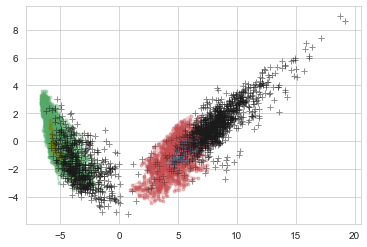

In [129]:
# DBSCAN at 3.7
colors = ["g", "greenyellow", "olive", "r", "b", "c"]
for klass, color in zip(range(0, 6), colors):
    Xk = train_pca[labels_37 == klass]
    plt.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3, marker=".")
    plt.plot(train_pca[labels_37 == -1, 0], train_pca[labels_37 == -1, 1], "k+", alpha=0.1)
#.set_title("Clustering at 4.5 epsilon cut\nDBSCAN")

In [140]:
# DBSCAN at 4
labels_40 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=4.4,
)

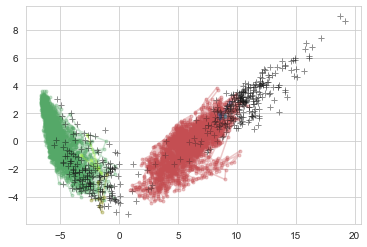

In [141]:
# DBSCAN at 4
colors = ["g", "greenyellow", "olive", "r", "b", "c"]
for klass, color in zip(range(0, 6), colors):
    Xk = train_pca[labels_40 == klass]
    plt.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3, marker=".")
    plt.plot(train_pca[labels_40 == -1, 0], train_pca[labels_40 == -1, 1], "k+", alpha=0.1)
#.set_title("Clustering at 4.5 epsilon cut\nDBSCAN")